#### Exploratory Data Analysis on Immigration to Cannada 

In this notebook, I'll perform data cleaning, analysis and mainly visualize the data imported to gain insights into the immigrant trends in Canada. 


Python libraries such as Pandas for data manipulation and analysis, Numpy for high-level mathematical functions to operate on arrays, Matplotlib
for creating static, animated, and interactive visualizations, and Seaborn for drawing attractive and informative statistical graphics are used in this 
notebook to perform the necessary functions.


Data visualization is the representation of data through the use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

To gain familiarity with visualization tools for EDA and ML, I have followed through the data Visualization with python course by IBM to create this notebook



### First lets import the necessary functions and data into the Notebook

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

#### Changing a few matplotlib variables to make the visualizations look better and big, without having to repeat the process on each plot.

In [4]:
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
file = '../input/canada-immigratation/Canada.xlsx'
df = pd.ExcelFile(file) #importing the excel document

In [6]:
print(df.sheet_names)

['Regions by Citizenship', 'Canada by Citizenship', 'Canada by Citizenship (2)']


In [7]:
df_canada = df.parse('Canada by Citizenship (2)',skiprows=range(20)) #selecting which page in the excel sheet 

#### As we can see the column headings are not correct and we have some extra data that we'll need to remove.

In [8]:
df_canada

,Immigrants,Foreigners,Benin,903,Africa,914,Western Africa,902,Developing regions,2,...,112,95,116,183,205,238,290,284,391,397
0,Immigrants,Foreigners,Bhutan,935,Asia,5501,Southern Asia,902,Developing regions,0,...,1,5,10,7,36,865,1464,1879,1075,487
1,Immigrants,Foreigners,Bolivia (Plurinational State of),904,Latin America and the Caribbean,931,South America,902,Developing regions,44,...,85,134,139,107,143,214,180,86,83,107
2,Immigrants,Foreigners,Bosnia and Herzegovina,908,Europe,925,Southern Europe,901,Developed regions,0,...,188,211,217,209,182,156,168,140,121,119
3,Immigrants,Foreigners,Botswana,903,Africa,913,Southern Africa,902,Developing regions,10,...,9,7,11,8,28,15,42,53,64,76
4,Immigrants,Foreigners,Brazil,904,Latin America and the Caribbean,931,South America,902,Developing regions,211,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
172,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
173,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
174,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [9]:
df_canada.columns

Index([        'Immigrants',         'Foreigners',              'Benin',
                        903,             'Africa',                  914,
           'Western Africa',                  902, 'Developing regions',
                          2,                    5,                    4,
                          3,                '4.1',                '3.1',
                          6,                '4.2',                   20,
                         14,                   13,               '13.1',
                         25,               '25.1',                   18,
                         15,                   29,                   32,
                         19,                   37,                   35,
                         66,                   71,                   78,
                        112,                   95,                  116,
                        183,                  205,                  238,
                        290,                  284, 

In [10]:
df_canada.drop(['Immigrants','Foreigners',903,914,902],inplace = True,axis=1) # for my analysis i deemed these columns not to provide and value

In [11]:
df_canada.head(2)

,Benin,Africa,Western Africa,Developing regions,2,5,4,3,4.1,3.1,...,112,95,116,183,205,238,290,284,391,397
0,Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,...,1,5,10,7,36,865,1464,1879,1075,487
1,Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,...,85,134,139,107,143,214,180,86,83,107


In [12]:
df_canada.rename(columns={'Benin':'Country','Africa':'Continent','Western Africa':'Region'},
                inplace = True)

In [13]:
df_canada.head(2)

,Country,Continent,Region,Developing regions,2,5,4,3,4.1,3.1,...,112,95,116,183,205,238,290,284,391,397
0,Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,...,1,5,10,7,36,865,1464,1879,1075,487
1,Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,...,85,134,139,107,143,214,180,86,83,107


#### Let us calculate the total Immigrants from each country and add a new column called 'total' to store those values.

In [14]:
df_canada['total'] = df_canada.sum(axis=1,skipna=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [15]:
df_canada

,Country,Continent,Region,Developing regions,2,5,4,3,4.1,3.1,...,95,116,183,205,238,290,284,391,397,total
0,Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,...,5,10,7,36,865,1464,1879,1075,487,5876
1,Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,...,134,139,107,143,214,180,86,83,107,3205
2,Bosnia and Herzegovina,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,211,217,209,182,156,168,140,121,119,21855
3,Botswana,Africa,Southern Africa,Developing regions,10,1,3,3,7,4,...,7,11,8,28,15,42,53,64,76,396
4,Brazil,Latin America and the Caribbean,South America,Developing regions,211,220,192,139,145,130,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
172,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
173,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677
174,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,...,615,454,663,611,508,494,434,437,407,8598


In [16]:
years = list(range(1980,2013))

In [17]:
df_canada.rename(columns={2:1980,5:1981, 4:1982,3:1983,'4.1':1984,'3.1':1985,6:1986,'4.2':1987,20:1988,14:1989,13:1990,'13.1':1991,25:1992,'25.1':1993,18:1994,15:1995,29:1996,32:1997,19:1998,37:1999,35:2000,66:2001,71:2002,78:2003,112:2004,95:2005,116:2006,183:2007,205:2008,238:2009,290:2010,284:2011,391:2011,397:2012},
                inplace = True)

In [18]:
df_canada.columns

Index([           'Country',          'Continent',             'Region',
       'Developing regions',                 1980,                 1981,
                       1982,                 1983,                 1984,
                       1985,                 1986,                 1987,
                       1988,                 1989,                 1990,
                       1991,                 1992,                 1993,
                       1994,                 1995,                 1996,
                       1997,                 1998,                 1999,
                       2000,                 2001,                 2002,
                       2003,                 2004,                 2005,
                       2006,                 2007,                 2008,
                       2009,                 2010,                 2011,
                       2011,                 2012,              'total'],
      dtype='object')

In [19]:
df_canada.set_index('Country',inplace=True)

#### Here we have the requied dataframe on which we'll be performing visualizations on

In [20]:
df_canada

,Continent,Region,Developing regions,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2011,2012,total
Country,,,,,,,,,,,,,,,,,,,,,
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,79,...,134,139,107,143,214,180,86,83,107,3205
Bosnia and Herzegovina,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,211,217,209,182,156,168,140,121,119,21855
Botswana,Africa,Southern Africa,Developing regions,10,1,3,3,7,4,2,...,7,11,8,28,15,42,53,64,76,396
Brazil,Latin America and the Caribbean,South America,Developing regions,211,220,192,139,145,130,205,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


#### Case Study

Why did so many Canada see so many Immigrants?

2000 – Right of Landing Fee (now Right of PR fee) is eliminated for refugees.

2001 –250,000 immigrants came to Canada: – 66,000 family class -140,000 skilled workers, 15,000 entrepreneurs, investors, or self-employed and 27,094 refugees.

In [21]:
df_canada.loc['Brazil','total']

29659

In [22]:
df_canada.sort_values(['total'], ascending=False,axis=0,inplace=True)

#### These are the Top five countries from which Immigrants came from most to Canada, Unknown being not have data on of thier origin.

In [23]:
df_canada.head()

,Continent,Region,Developing regions,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2011,2012,total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Unknown,World,World,World,44000,18078,16904,13635,14855,14368,13303,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391


### Case Study
Why did immigrants come to Canada in the 1980s?
The vast majority, however, were refugees fleeing war, famine, and political and economic instability in their countries of origin. With the economic slowdown of the 1990s.

In [24]:
df_top_countries = df_canada.head()

In [25]:
df_top_countries = df_top_countries[years].transpose()

In [26]:
df_top_countries

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines
1980,8880,5123,22045,44000,6051
1981,8670,6682,24796,18078,5921
1982,8147,3308,20620,16904,5249
1983,7338,1863,10015,13635,4562
1984,5704,1527,10170,14855,3801
1985,4211,1816,9564,14368,3150
1986,7150,1960,9470,13303,4166
1987,10189,2643,21337,17304,7360
1988,11522,2758,27359,22279,8639
1989,10343,4323,23795,27118,11865


#### Note
Area charts are used to represent cumulated totals using numbers or percentages (stacked area charts in this case) over time.

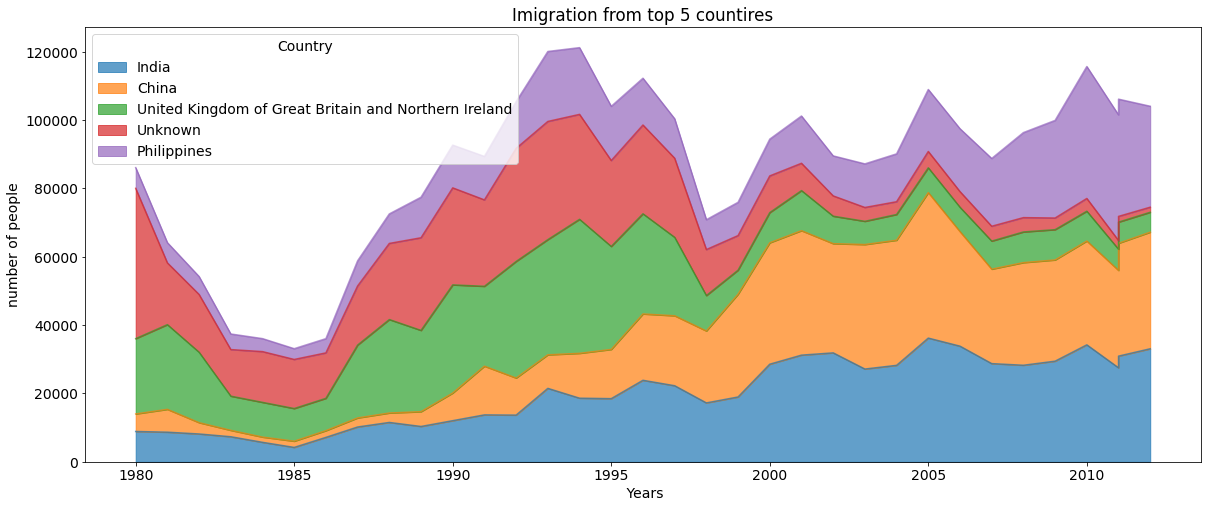

<Figure size 864x576 with 0 Axes>

In [27]:
df_top_countries.plot.area(figsize=(20,8),alpha=0.7)
plt.title("Imigration from top 5 countires")
plt.xlabel(" Years")
plt.ylabel("number of people")
plt.figure(figsize=(12,8));

#### Case study
2006 –20 percent of Canada’s population is born outside of Canada. China and Hong Kong, India, and the Philippines are the top three sources for Canadian immigrants.

#### Note
A line plot is a graph that shows frequency of data along a number line. It is best to use a line plot when comparing fewer than 25 numbers. It is a quick, simple way to organize data.

Bar plots allows you to compare different sets of data among different groups easily.

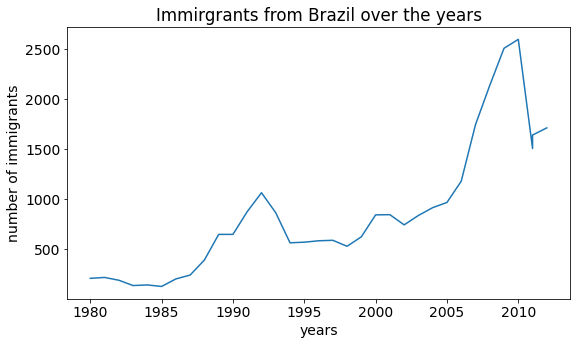

In [28]:
df_canada.loc['Brazil',years].plot(kind='line');
plt.title("Immirgrants from Brazil over the years")
plt.xlabel("years")
plt.ylabel("number of immigrants");

In [29]:
df_topc = df_canada.total.head(10)

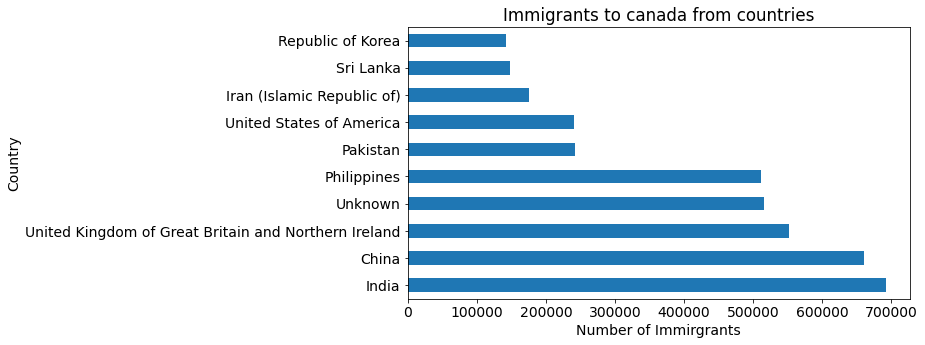

In [30]:
df_topc.plot(kind='barh');
plt.title("Immigrants to canada from countries")
plt.xlabel("Number of Immirgrants");

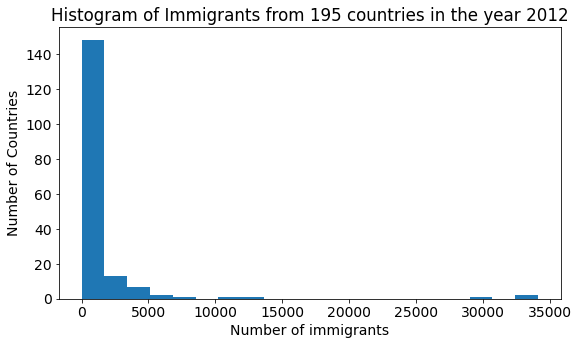

In [31]:

df_canada[2012].plot(kind = 'hist',bins = 20 );
plt.title("Histogram of Immigrants from 195 countries in the year 2012")
plt.xlabel("Number of immigrants")
plt.ylabel("Number of Countries");


In [32]:
df_india = df_canada.loc['India', years]
df_china = df_canada.loc['China', years]

#### Case Study
India is by far Canada's leading source of global talent. In 2021, Canada welcomed over 405,000 immigrants, an all-time high. Nearly one-third of these immigrants are of Indian origin. In addition, Canada welcomed nearly 450,000 international students last year, with Indians comprising almost 50 per cent of this total.

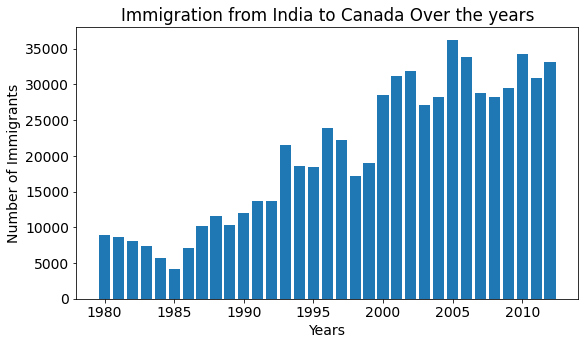

In [33]:
plt.bar(df_india.index,df_india);
plt.title("Immigration from India to Canada Over the years")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants");

#### Case Study 
Why did immigrants from China come to Canada?
Their move from their home country is the result of a desire for freedom and a better quality of life. Due to their long-time contributions, Canada has allowed Chinese immigrants to thrive and populate. As a result, the Chinese have become one of the largest ethnic groups to make up the Canadian population.

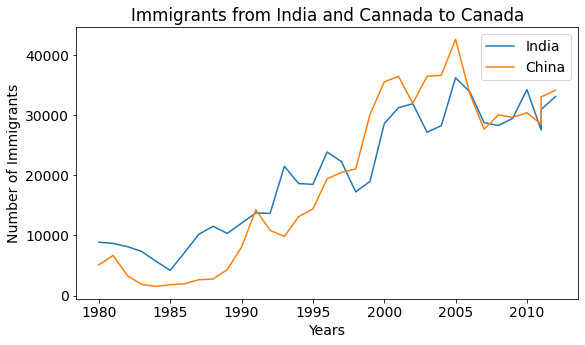

In [34]:
plt.plot(df_india.index,df_india);
plt.plot(df_china.index,df_china);
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")
plt.title("Immigrants from India and Cannada to Canada");
plt.legend(['India','China']);

In [35]:
df_continents = df_canada.groupby('Continent').sum()

#### Immigration to Canada categorised by continents

In [36]:
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2011,2012,total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3868,4288,3738,2593,2568,2600,3702,7353,7279,9440,...,23507,24081,24372,25604,28841,35789,30793,33848,33770,544544
Asia,30926,34189,30088,24567,27104,23415,27757,41957,46140,58784,...,151051,141565,127487,134505,137117,156877,141602,146485,148986,3187153
Europe,39014,44024,42000,24224,21977,20498,23974,46148,54193,60356,...,33652,31353,31763,33182,33441,31939,25466,27775,27371,1371511
Latin America and the Caribbean,12299,14363,15793,14909,13076,14584,20616,27547,21176,24131,...,23408,23658,25195,25763,26172,28147,27368,26633,24438,735757
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1240,1199,1191,701,561,601,548,732,771,985,...,676,597,660,816,842,901,697,697,654,31339
World,44000,18078,16904,13635,14855,14368,13303,17304,22279,27118,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


#### Note
Heatmaps shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader

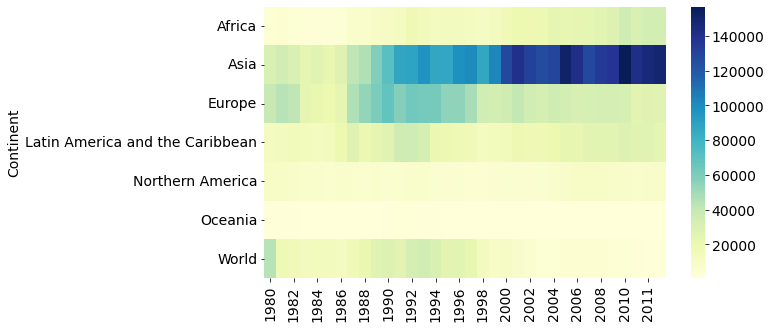

In [37]:
sns.heatmap(df_continents[years] , cmap="YlGnBu" );

In [38]:
df_continents = df_continents.drop(['World'],axis=0)

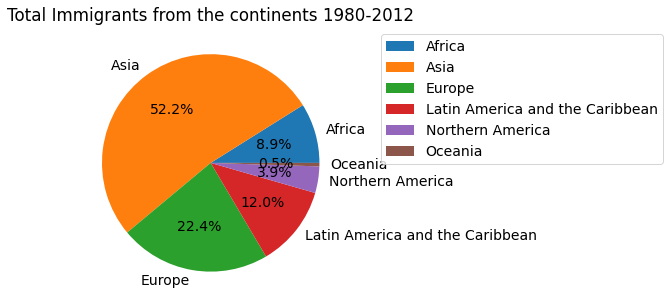

In [39]:
plt.pie(df_continents.total,labels=df_continents.index,autopct='%1.1f%%');
plt.legend(df_continents.index,bbox_to_anchor=(1.1,1.0));
plt.title("Total Immigrants from the continents 1980-2012");
plt.style.use('Solarize_Light2');
#df_continents['total'].plot(kind='pie')

In [40]:
df_japan  = df_canada.loc['Japan',years]

In [41]:
df_KS = df_canada.loc[['Sri Lanka','Republic of Korea'], years].transpose()

#### Note
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. 

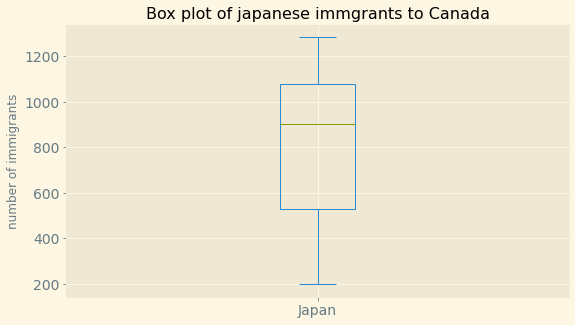

In [42]:
df_japan.plot(kind='box')
plt.title("Box plot of japanese immgrants to Canada")
plt.ylabel('number of immigrants');
plt.style.use('Solarize_Light2');

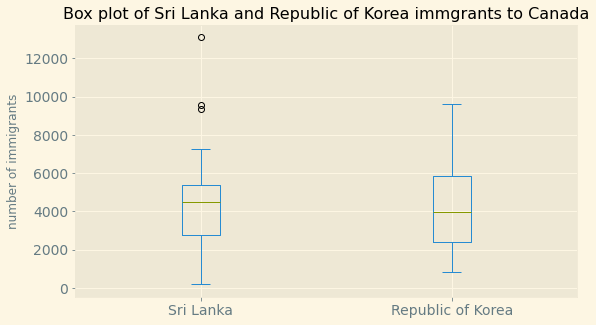

In [43]:
df_KS.plot(kind = 'box')
plt.title("Box plot of Sri Lanka and Republic of Korea immgrants to Canada")
plt.ylabel('number of immigrants');
plt.style.use('Solarize_Light2');

In [44]:
df_total = df_canada[years].transpose()

In [45]:
df_total

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Nauru,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,8880,5123,22045,44000,6051,978,9378,1172,185,1011,...,1,0,0,0,0,1,0,0,0,0
1981,8670,6682,24796,18078,5921,972,10030,1429,371,1456,...,0,0,0,0,1,0,0,0,0,0
1982,8147,3308,20620,16904,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
1983,7338,1863,10015,13635,4562,900,7100,1592,197,1081,...,0,1,0,0,0,0,0,0,0,0
1984,5704,1527,10170,14855,3801,668,6661,1977,1086,847,...,0,0,0,0,1,0,0,0,0,0
1985,4211,1816,9564,14368,3150,514,6543,1648,845,962,...,0,0,0,0,0,0,0,0,0,0
1986,7150,1960,9470,13303,4166,691,7074,1794,1838,1208,...,0,0,0,0,0,1,0,0,0,0
1987,10189,2643,21337,17304,7360,1072,7705,2989,4447,2338,...,0,0,0,0,0,0,0,0,0,0
1988,11522,2758,27359,22279,8639,1334,6469,3273,2779,2805,...,1,0,0,0,1,0,0,0,0,0
1989,10343,4323,23795,27118,11865,2261,6790,3781,2758,2979,...,0,2,0,0,0,0,0,0,0,0


In [46]:
countries = list(df_canada.head(10).index) 

In [47]:
countries.remove('Unknown')

In [48]:
df_total.columns

Index(['India', 'China',
       'United Kingdom of Great Britain and Northern Ireland', 'Unknown',
       'Philippines', 'Pakistan', 'United States of America',
       'Iran (Islamic Republic of)', 'Sri Lanka', 'Republic of Korea',
       ...
       'Nauru', 'Kiribati', 'Vanuatu', 'Sao Tome and Principe', 'Tuvalu',
       'San Marino', 'New Caledonia', 'Marshall Islands', 'Western Sahara',
       'Palau'],
      dtype='object', name='Country', length=176)

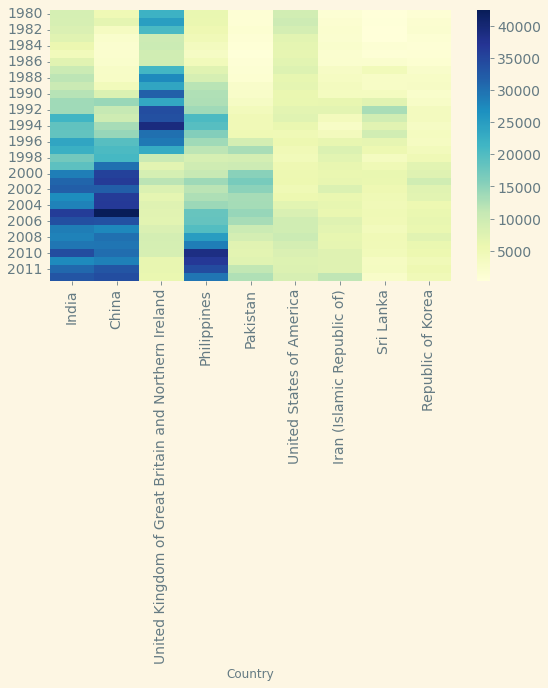

In [49]:
sns.heatmap(df_total[countries], cmap="YlGnBu");

In [50]:
df_total['total'] = df_total.sum(axis = 1 ,skipna = True)

In [51]:
df_total = df_total[['total']]

In [52]:
df_total.reset_index(level=0,inplace=True)

In [53]:
df_total.columns = ['year' , 'total']

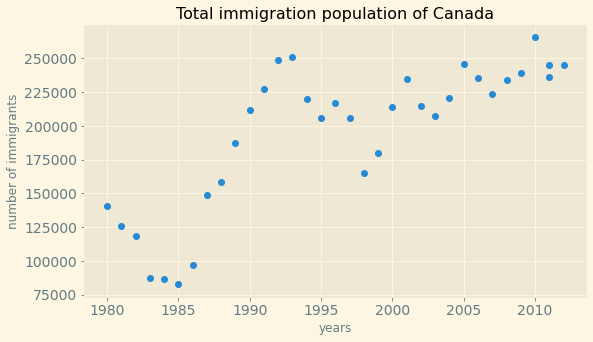

In [54]:
plt.scatter(x=df_total.year,y=df_total.total);
plt.title("Total immigration population of Canada")
plt.xlabel("years")
plt.ylabel("number of immigrants");
plt.style.use('Solarize_Light2');


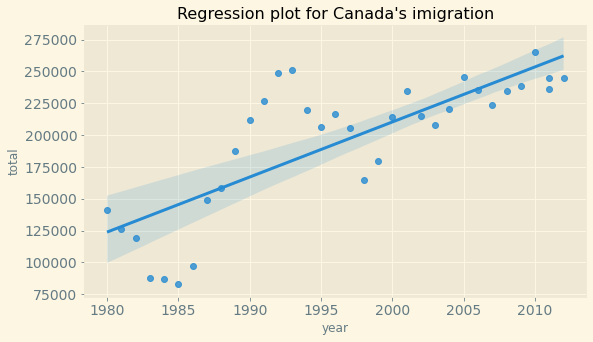

In [55]:
ax = sns.regplot(x='year', y='total' , data=df_total)
plt.title("Regression plot for Canada's imigration");
plt.style.use('Solarize_Light2');


#### Conclusion

from the visuals seen above we can say the immigration to Canada is increasing year by years due to the fact that Canada embraces multiculturalism can be noted from the fact that in the 1970s, under the direction of Prime Minister Pierre Trudeau, Canada officially adopted a policy to promote multiculturalism, and it has been ever since that multiculturalism has been a key part of the Canadian identity and also because they understand the social importance of immigration to Canada.

Canada is also one of the safest countries in the world, with one of the best education in the world.

Despite the pandemic, Canada reached record numbers in 2021 with over 405,000 people becoming permanent residents. For 2022, Canada has recently released a revised target of over 432,000 immigrants and even higher numbers in 2023 and 2024.

